# Illustrates the use of the WR (Weather Regime) class

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
import sys
sys.path.insert(0, '../')

In [3]:
from paleopy import proxy
from paleopy import analogs
from paleopy import ensemble
from paleopy import WR
from paleopy.plotting import scalar_plot

In [4]:
proxies_num = pd.read_excel('../data/ProxiesLIANZSWP.xlsx', sheetname='numerical')

In [5]:
row = proxies_num.iloc[0,]

In [6]:
row

Site        Rarotonga
Lat            -21.23
Long          -159.82
Anom              0.6
dataset         ersst
variable          sst
Name: 0, dtype: object

In [7]:
djsons = '../jsons/'
pjsons = '../jsons/proxies'

In [8]:
p = proxy(sitename='Rarotonga', \
          lon = -159.82, \
          lat = -21.23, \
          djsons = djsons, \
          pjsons = pjsons, \
          pfname = 'Rarotonga.json', \
          dataset = 'ersst', \
          variable ='sst', \
          measurement ='delta O18', \
          dating_convention = 'absolute', \
          calendar = 'gregorian',\
          chronology = 'historic', \
          season = 'DJF', \
          value = 0.6, \
          calc_anoms = True, \
          detrend = True)

In [9]:
# extract the time-series
p.extract_ts()

print("{}{} --> {}{}: {} km".format(p.sitename, p.coords, p.variable, p.extracted_coords.tolist(), p.distance_point))

# calculates the season
p.calculate_season()

p.find_analogs()

Rarotonga(200.18, -21.23) --> sst[200.0, -22.0]: 87.56368858840081 km


In [10]:
p.proxy_repr(pprint=True)

{
sitename:Rarotonga
proxy_type:None
measurement:delta O18
dating_convention:absolute
calendar:gregorian
chronology:historic
coords:(200.18, -21.23)
aspect:None
elevation:None
season:DJF
dataset:ersst
variable:sst
calc_anoms:True
detrend:True
value:0.6
climatology:(1981, 2010)
period:(1979, 2014)
extracted_coords:[200.0, -22.0]
distance_point:87.56368858840081
trend_params:{'intercept': -60.96501637775517, 'slope': 0.030535947029886681}
category:WA
analog_years:[1982, 1997, 1999, 2000, 2001, 2006, 2009]
}


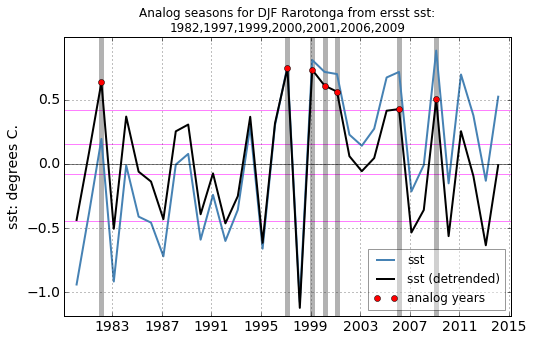

In [11]:
f = p.plot_season_ts()

In [12]:
from paleopy import WR

### try with a proxy object

In [13]:
w = WR(p, classification='SW Pacific')

In [14]:
obs_probs = w._get_compos_probs(w.analog_years)

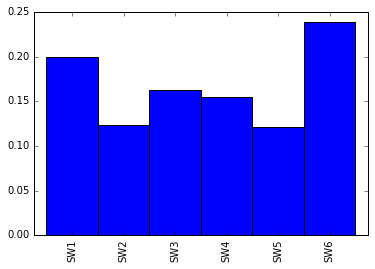

In [21]:
w._get_clim_probs().plot(kind='bar', width=1)

In [17]:
w.probs_anomalies(kind='one')

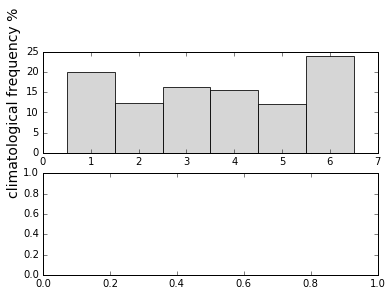

In [19]:
f = w.plot_bar()

that should fail with a size error exception, the heatmaps and bar plots will
only work if an ensemble object is passed

In [ ]:
w.parent.description

The following should work

### try with passing an `ensemble` object 

In [ ]:
ens = ensemble(djsons=djsons, pjsons=pjsons, season='DJF')

In [ ]:
classification = 'SW Pacific'
classification = 'New Zealand'

In [ ]:
w = WR(ens, classification=classification)

In [ ]:
w.parent.description

In [ ]:
w.climatology

In [ ]:
w.probs_anomalies(kind='many')

In [ ]:
w.df_anoms

In [ ]:
f = w.plot_heatmap()

In [ ]:
f = w.plot_bar()